In [146]:
# Import frameworks
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

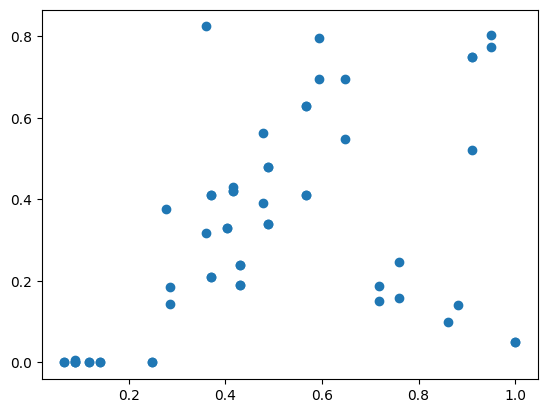

In [147]:
# Create a data frame from the csv file
data = pd.read_csv('model_ready_data.csv')
plt.scatter(data['Risk%'], data['AHI'])

# Split the data into training and testing data
training_data, testing_data = train_test_split(data, test_size=0.4, shuffle=False)

# Save the training and testing data to csv files
training_data.to_csv('training_data.csv', index=False)
testing_data.to_csv('testing_data.csv', index=False)

In [148]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

In [149]:
training_data = pd.read_csv('training_data.csv')

x_name = ['Risk%']
y_name = 'AHI'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

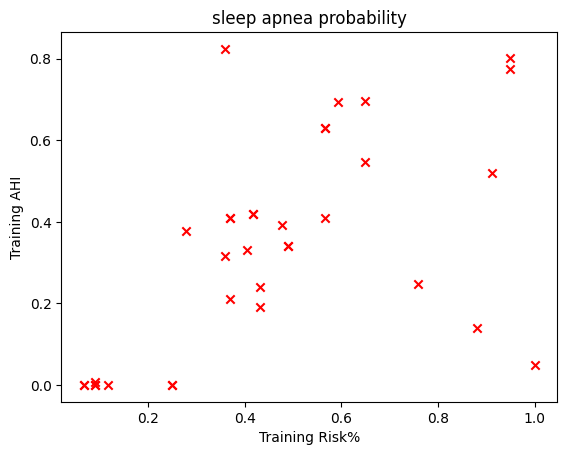

In [150]:
if(len(x_name) == 1):
    plt.scatter(x, y, marker='x', c='r')
    plt.title("sleep apnea probability")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3))
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("sleep apnea probability")
plt.show()

In [151]:
poly = PolynomialFeatures(degree=7, include_bias=False)
test_poly = PolynomialFeatures(degree=7, include_bias=False)
poly_features = poly.fit_transform(x)

# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(poly_features, y)

LinearRegression()

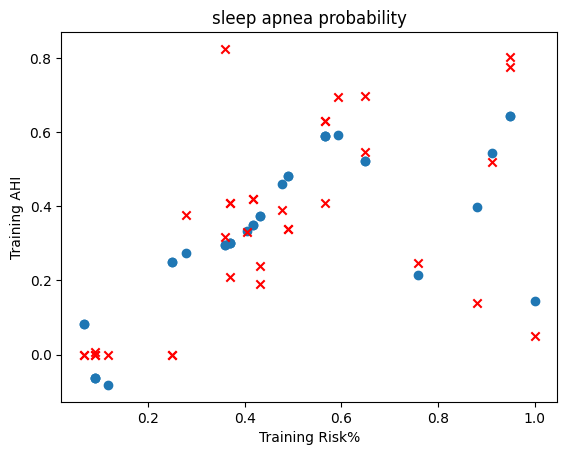

In [152]:
y_pred = my_model.predict(poly_features)
if(len(x_name) == 1):
    plt.scatter(x, y_pred)
    plt.scatter(x, y, marker='x', c='r')
    plt.title("sleep apnea probability")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
        ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("sleep apnea probability")
plt.show()

In [153]:
# save the model to disk
filename = 'apnea_model_poly.sav'
pickle.dump(my_model, open(filename, 'wb'))

In [154]:
x_col = 'Risk%'
testing_data = pd.read_csv('testing_data.csv')
x_test = test_poly.fit_transform(np.array(testing_data[x_col]).reshape(-1, 1))
y_test = np.array(testing_data['AHI'])

In [155]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Predictions
y_train_pred = my_model.predict(poly_features)
y_test_pred = my_model.predict(x_test)

# Metrics
train_mse = root_mean_squared_error(y, y_train_pred)
test_mse = root_mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_mse}, Testing RMSE: {test_mse}")
print(f"Training R2: {train_r2}, Testing R2: {test_r2}")

Training RMSE: 0.15180477710128915, Testing RMSE: 0.12780501753728135
Training R2: 0.6541527705071797, Testing R2: 0.7294375938916877


In [156]:
Age = input("Enter your age: ")
BMI = input("Enter your BMI: ")
# Convert inputs to float
Age = float(Age)
BMI = float(BMI)

#the minimum value with space for outliers
MIN_BMI = 17
#the maximum value with space for outliers
MAX_BMI = 48
#scale features
BMI = (BMI - MIN_BMI) / (MAX_BMI - MIN_BMI)

data_frame = pd.read_csv('model_ready_data.csv')
Risk = BMI * Age
input_value = (Risk / data_frame['Risk'].max()).round(4)



# Define a function to predict based on input
def predict_value(input_value):
    # Ensure the input is in the correct format
    input_array = np.array(input_value).reshape(-1, 1)
    # Transform the input using the polynomial features
    input_poly = poly.transform(input_array)
    # Predict using the trained model
    prediction = my_model.predict(input_poly)
    return prediction


# Example: Predict for a given Risk% value
input_value = [[input_value]]  # Replace 50 with your desired input
predicted_value = predict_value(input_value)

#the minimum value with space for outliers
MIN_AHI = 0
#the maximum value with space for outliers
MAX_AHI = 100
#scale features
AHI = (predicted_value[0] + MIN_AHI) * (MAX_AHI + MIN_AHI)

print(f"Predicted AHI for Risk% {input_value[0][0]}: {AHI}")

ValueError: could not convert string to float: ''